In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("./BlackFriday.csv")

In [4]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [7]:
data.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [15]:
data.sample(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
210615,1002476,P00114342,M,51-55,12,C,1,1,1,8.0,17.0,19126
91174,1002008,P00177342,M,26-35,3,C,0,0,8,NaN,NaN,1969
254460,1003294,P00110842,M,18-25,4,B,3,0,1,2.0,5.0,15352
334871,1003593,P00220442,F,26-35,9,C,1,0,5,14.0,NaN,7044
226868,1004957,P00353142,M,26-35,2,A,1,1,5,NaN,NaN,5359


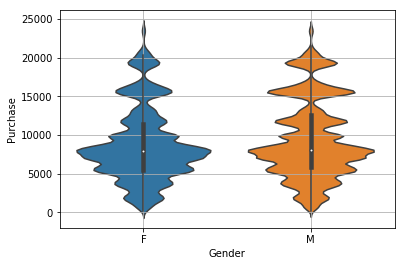

In [42]:
_ = sns.violinplot(x='Gender', 
                   y='Purchase', 
                   data=data)
_ = plt.grid()

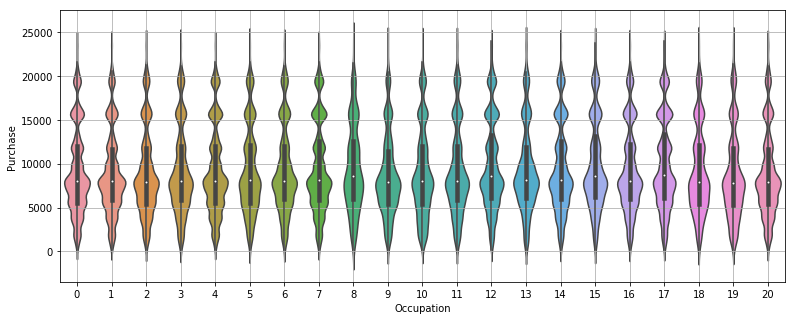

In [43]:
_ = plt.figure(figsize=(13, 5))
_ = sns.violinplot(x='Occupation', y='Purchase', data=data)
_ = plt.grid()

In [45]:
pd.value_counts(data["Age"])

26-35    214690
36-45    107499
18-25     97634
46-50     44526
51-55     37618
55+       20903
0-17      14707
Name: Age, dtype: int64

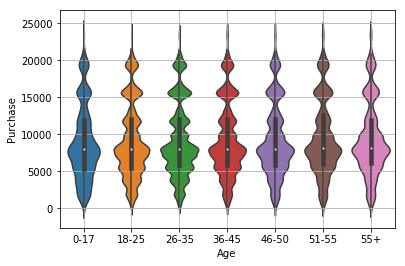

In [46]:
_ = sns.violinplot(
    x='Age',
    y='Purchase',
    data=data,
    order=["0-17", "18-25", "26-35", "36-45", "46-50", "51-55", "55+"])
_ = plt.grid()

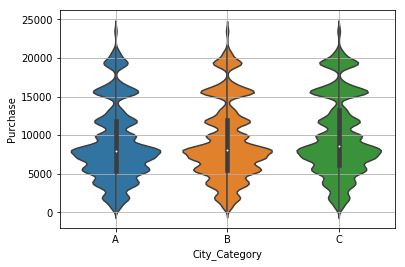

In [47]:
_ = sns.violinplot(
    x='City_Category', y='Purchase', data=data, order=["A", "B", "C"])
_ = plt.grid()

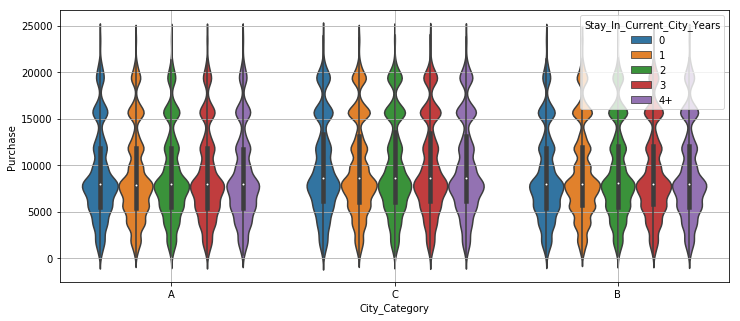

In [48]:
_ = plt.figure(figsize=(12, 5))
_ = sns.violinplot(
    x='City_Category',
    y='Purchase',
    hue="Stay_In_Current_City_Years",
    hue_order=list(sorted(pd.value_counts(data["Stay_In_Current_City_Years"]).index.tolist())),
    data=data)
_ = plt.grid()

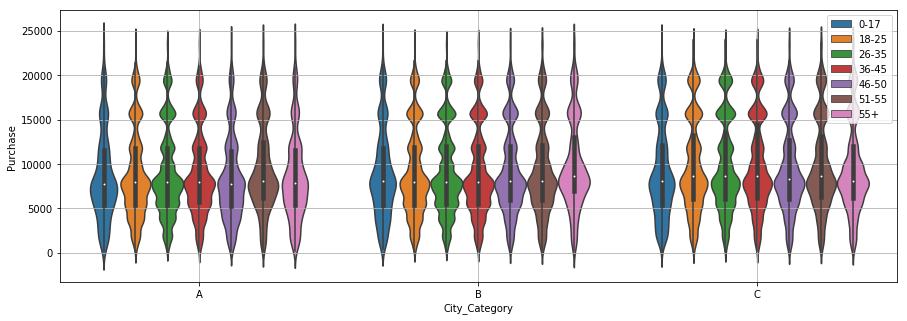

In [50]:
_ = plt.figure(figsize=(15, 5))
_ = sns.violinplot(
    x='City_Category',
    y='Purchase',
    hue="Age",
    data=data,
    order=["A", "B", "C"],
    hue_order=["0-17", "18-25", "26-35", "36-45", "46-50", "51-55", "55+"])
_ = plt.legend(loc='best')
_ = plt.grid()

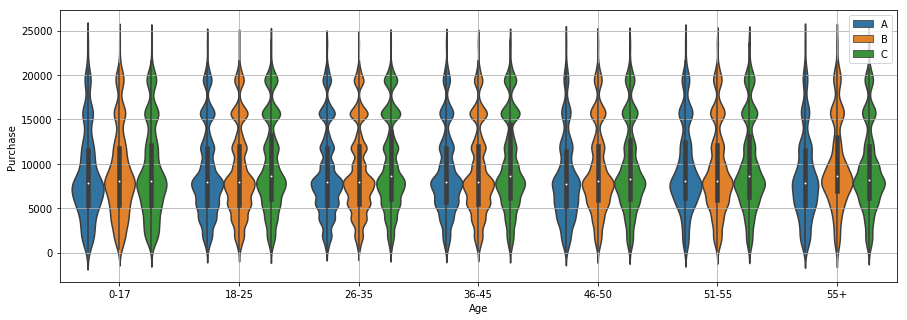

In [51]:
_ = plt.figure(figsize=(15, 5))
_ = sns.violinplot(
    x='Age',
    y='Purchase',
    hue="City_Category",
    data=data,
    hue_order=["A", "B", "C"],
    order=["0-17", "18-25", "26-35", "36-45", "46-50", "51-55", "55+"])
_ = plt.legend(loc='best')
_ = plt.grid()

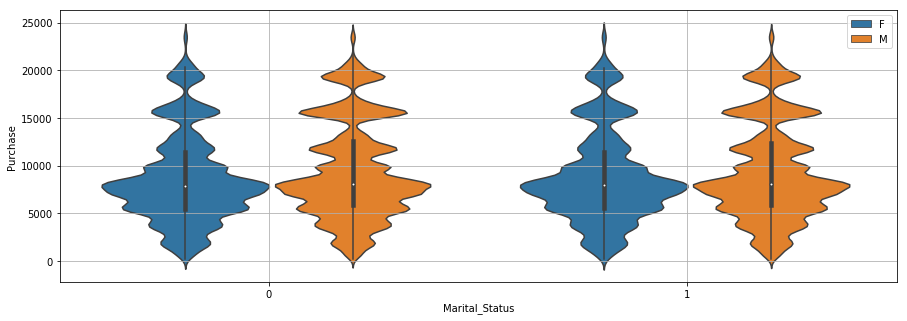

In [41]:
_ = plt.figure(figsize=(15, 5))
_ = sns.violinplot(
    x='Marital_Status',
    y='Purchase',
    hue="Gender",
    data=data,
    hue_order=None,
    order=None)
_ = plt.legend(loc='best')
_ = plt.grid()

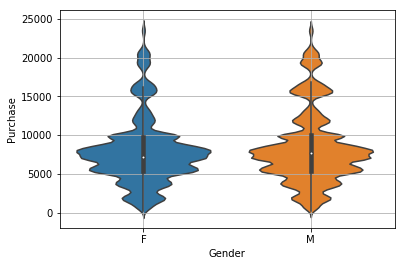

In [52]:
_ = sns.violinplot(x='Gender', y='Purchase', data=data[data.Product_Category_3.isna()])
_ = plt.grid()

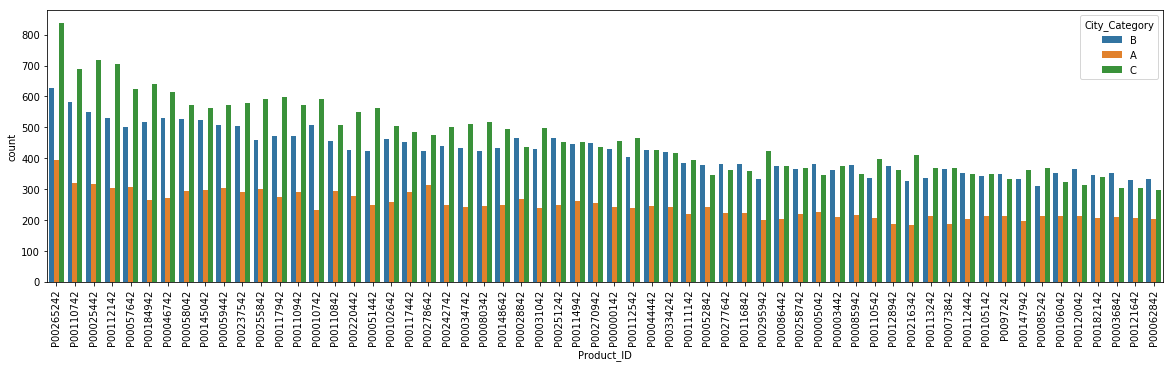

In [127]:
product_count = pd.value_counts(data["Product_ID"])
product_order = product_count.head(60).index
_ = plt.figure(figsize=(20, 5))
_ = sns.countplot(
    x="Product_ID",
    hue="City_Category",
    order=product_order,
    data=data[data["Product_ID"].isin(product_order)])
_ = plt.xticks(rotation=90)

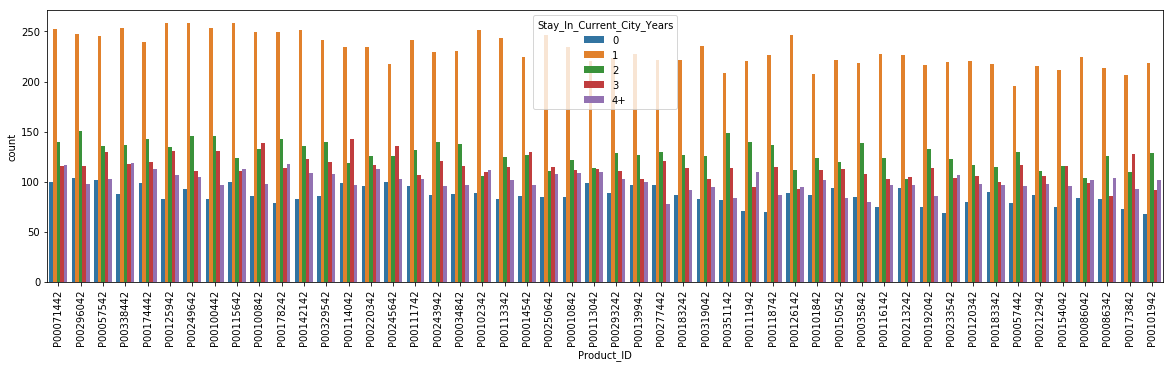

In [132]:
product_count = pd.value_counts(data["Product_ID"])
product_order = product_count.iloc[100:150].index
_ = plt.figure(figsize=(20, 5))
_ = sns.countplot(
    x="Product_ID",
    hue="Stay_In_Current_City_Years",
    order=product_order,
    hue_order=["0", "1", "2", "3", "4+"],
    data=data[data["Product_ID"].isin(product_order)])
_ = plt.xticks(rotation=90)

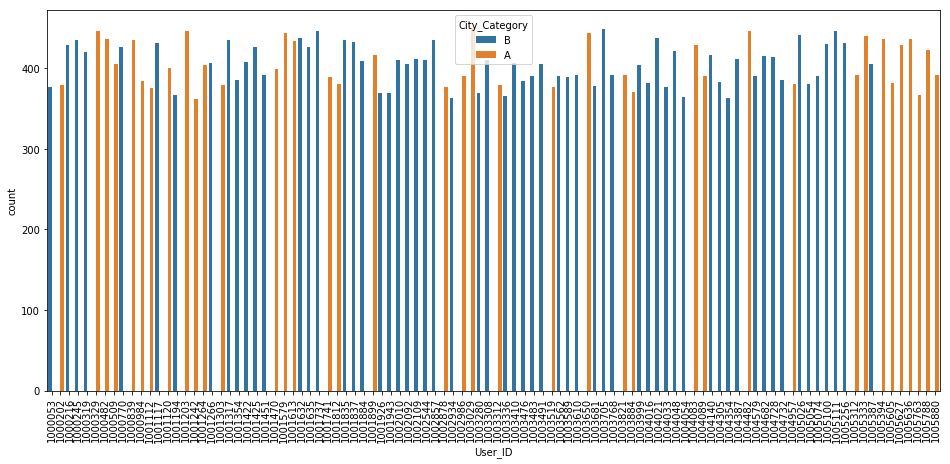

In [106]:
product_count = pd.value_counts(data["User_ID"])
_ = plt.figure(figsize=(16, 7))
_ = sns.countplot(
    x="User_ID",
    hue="City_Category",
    data=data[data["User_ID"].isin(product_count.iloc[100:200].index)])
_ = plt.xticks(rotation=90)

In [103]:
data[data["Product_ID"].isin(product_count[product_count > 100].index)]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871
10,1000005,P00251242,M,26-35,20,A,1,1,5,11.0,NaN,5254


In [80]:
?pd.DataFrame.sort_values